In [60]:
BASE_DIR = '../'*3
MLPMODEL = BASE_DIR +'code/MLP/MLP_MODEL/mlp_model.ipynb'
PREPRO = BASE_DIR + 'code/UTIL/dataset/office31_prepro.ipynb'
%run {MLPMODEL}
%run {PREPRO}

Using device: cuda
NVIDIA GeForce RTX 3060 Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.4 GB
Using PyTorch version: 1.10.1


In [65]:
EPOCH = 50
BATCH_SIZE=20
NUM_WORKERS=8
LEARNING_RATE = 0.0001

Model office31_model_1 train started 


None
!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Linear(in_features=30000, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=34, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0
    nesterov: False
    weight_decay: 0
)
    Epoch 10: cost=3.846, accuracy=0.777+0.075/0.800+0.040 (9/9 secs)
    Epoch 20: cost=3.580, accuracy=0.812+0.135/0.830+0.130 (9/18 secs)
    Epoch 30: cost=3.387, accuracy=0.831+0.156/0.820+0.150 (8/26 secs)
    Epoch 40: cost=3.260, accuracy=0.841+0.178/0.790+0.180 (8/34 secs)
    Epoch 50: cost=3.161, accuracy=0.859+0.208/0.790+0.160 (9/43 secs)
Model office31_model_1 train ended in 43 secs:
Model office31_model

/home/ubuntu/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


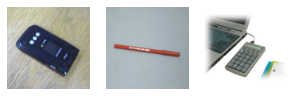

[ 도메인 추정결과 ]
추정확률분포 [48,25,27] => 추정 amazon : 정답 webcam => X
추정확률분포 [20,11,69] => 추정 webcam : 정답 webcam => O
추정확률분포 [99, 1, 1] => 추정 amazon : 정답 amazon => O
[ 상품 추정결과 ]
추정확률분포 [ 0, 0, 9, 0, 0, 1, 1, 0,...] => 추정 mouse : 정답 mobile_phone => X
추정확률분포 [ 0,10, 0, 1, 1, 1, 0, 7,...] => 추정 scissors : 정답 pen => X
추정확률분포 [ 0, 0, 7, 1, 0, 2, 1, 0,...] => 추정 ring_binder : 정답 calculator => X


In [67]:
od = Office31Dataset()
om1 = Mlp_Torch('office31_model_1', od, [64,32,10])
om1.exec_all(epoch_count=EPOCH, report=10,batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS)
# SGD

Model office31_model_1 train started 


None
!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Linear(in_features=30000, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=34, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)
    Epoch 10: cost=3.424, accuracy=0.813+0.170/0.840+0.170 (10/10 secs)
    Epoch 20: cost=3.102, accuracy=0.868+0.216/0.840+0.170 (9/19 secs)
    Epoch 30: cost=2.789, accuracy=0.890+0.284/0.860+0.230 (10/29 secs)
    Epoch 40: cost=2.584, accuracy=0.894+0.317/0.810+0.240 (10/39 secs)
    Epoch 50: cost=2.437, accuracy=0.905+0.355/0.880+0.260 (11/50 secs)
Model office31_model_1 train ended in 50 secs:
Model off

/home/ubuntu/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


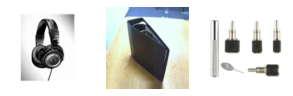

[ 도메인 추정결과 ]
추정확률분포 [98, 1, 1] => 추정 amazon : 정답 amazon => O
추정확률분포 [ 0, 2,98] => 추정 webcam : 정답 webcam => O
추정확률분포 [97, 2, 1] => 추정 amazon : 정답 amazon => O
[ 상품 추정결과 ]
추정확률분포 [ 0, 0, 1, 1, 1, 4, 1, 0,...] => 추정 stapler : 정답 headphones => X
추정확률분포 [ 0, 0, 0, 0, 0, 0, 1, 0,...] => 추정 monitor : 정답 ring_binder => X
추정확률분포 [ 0, 0, 0, 0, 0, 1, 0, 0,...] => 추정 scissors : 정답 punchers => X


In [66]:
om2 = Mlp_Torch('office31_model_1', od, [64,32,10])
om2.use_adam = True
om2.exec_all(epoch_count=EPOCH, report=10,batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS)
# Adam